In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
routeid_list = ["CAB285000006",
                "CAB285000007",
                "CAB285000008",
                "CAB285000009",
                "CAB285000010",
                "CAB285000011",
                "CAB285000012",
                "CAB285000013",
                "CAB285000024",
                "CAB285000025",
                "CAB285000293",
                "CAB285000294"]
dir_list = ["../Stage_1_1", "../Stage_2_1"]

In [20]:
for r_id in routeid_list:
    bus_dic = {}
    bus_df = pd.DataFrame(columns=['Stage', 'Time gap', 'Average'])
    
    for idx, directory in enumerate(dir_list):
        path =  directory 
        file_list = os.listdir(path)

        bus_dic[directory] = []
        
        for file in file_list:

            df = pd.read_csv(path+"/"+file)
            curr_bus = df[df["routeid"] == r_id]
            
            for i in range(0, len(curr_bus), 2):
                gap = curr_bus.iloc[i+1, 6] - curr_bus.iloc[i, 6]
                bus_dic[directory].append(abs(gap))

        bus_df.at[idx, "Stage"] = idx + 1
        bus_df.at[idx, "Time gap"] = bus_dic[directory]
        bus_df.at[idx, "Average"] = np.mean(bus_dic[directory])
    
    file_name = "../mine_1/"+r_id +"_1.csv"
    bus_df.to_csv(file_name, index=False, mode='w', encoding='utf-8-sig')
    

In [46]:
total_averages = pd.DataFrame(columns=["CAB285000006","CAB285000007","CAB285000008","CAB285000009","CAB285000010","CAB285000011","CAB285000012","CAB285000013","CAB285000024","CAB285000025","CAB285000293","CAB285000294"],index=["Stage1_1","Stage2_1"])

path =  "../mine_1"
file_list = os.listdir(path)
file_list


for i in range(0,len(file_list)):
    temp = pd.read_csv("../mine_1/"+file_list[i])
    #print(temp)
    r_id = file_list[i][:-6]
    #print(r_id)
    total_averages[r_id][0] = (temp["Average"][0])
    total_averages[r_id][1] = (temp["Average"][1])

total_averages["total_average"] = total_averages.mean(axis=1)
total_averages.to_csv("../csv/data_table_1.csv", index=False, mode='w', encoding='utf-8-sig')

In [74]:
df = pd.read_csv("../csv/data_table.csv")
df2 = pd.read_csv("../csv/data_table_1.csv")

In [75]:
df = df.drop("total_average", axis =1)
df2 = df2.drop("total_average", axis =1)

In [76]:
# 데이터 칼럼,인덱스 이름 변경
df.index = ["Stage1", "Stage2", "Stage3", "Stage4"]
df.columns = ["11(6)","11(7)","12(8)","12(9)","13(10)","13(11)","14(12)","14(13)","24(24)","24(25)","81(293)","81(294)"]
df.columns.names = ["bus_num(routeid)"]

df2.index = ["Stage1", "Stage2"]
df2.columns = ["11(6)","11(7)","12(8)","12(9)","13(10)","13(11)","14(12)","14(13)","24(24)","24(25)","81(293)","81(294)"]
df2.columns.names = ["bus_num(routeid)"]

In [77]:
route_info = pd.read_csv('../csv/route_info.csv')
interval_times = route_info['intervaltime']

In [84]:
time_gap_df = pd.DataFrame(columns=["Specified Time", "Actual Time(1,2,3,4)", "Actual Time(1_1,2_1)"])

In [85]:
for i, c in enumerate(df.columns):
    time_gap_df.loc[i] = [interval_times[i],df[c].mean()/60, df2[c].mean()/60]

time_gap_df.index = ["11(6)","11(7)","12(8)","12(9)","13(10)","13(11)","14(12)","14(13)","24(24)","24(25)","81(293)","81(294)"]
time_gap_df   

,Specified Time,"Actual Time(1,2,3,4)","Actual Time(1_1,2_1)"
11(6),10.0,13.159554,13.392099
11(7),10.0,12.804023,12.577538
12(8),7.0,9.048009,8.647220
12(9),7.0,9.583906,8.864285
13(10),11.0,10.474763,10.632883
13(11),11.0,12.816565,11.893448
14(12),10.0,14.732835,14.122980
14(13),10.0,11.418399,11.326981
24(24),20.0,19.196051,20.422007
24(25),20.0,18.441348,17.173547


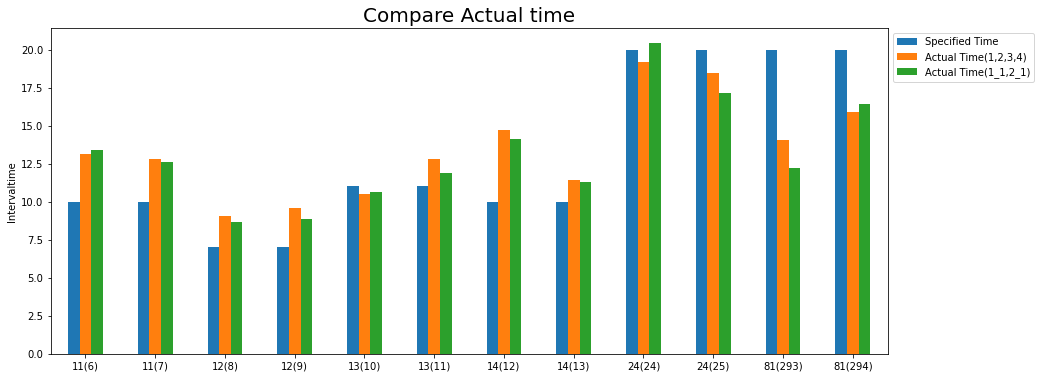

In [86]:
ax = time_gap_df.plot(kind="bar", width=0.5, figsize=(15,6), rot=0)
plt.title("Compare Actual time", fontsize=20)
plt.ylabel("Intervaltime")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
#plt.savefig('../image/Compare_Actual_time.png',dpi=300,bbox_inches='tight')